In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch import Tensor
from scipy.linalg import eigh

from KMEANS import kmeans_core

CUDA = torch.cuda.is_available()

ModuleNotFoundError: No module named 'KMEANS'

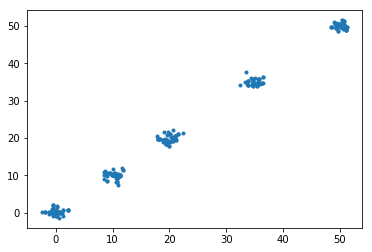

In [2]:
X = [np.random.randn(50, 2), np.random.randn(50, 2)+10, np.random.randn(50, 2)+20,np.random.randn(50, 2)+35,np.random.randn(50, 2)+50]
X = np.concatenate(X, axis=0)
X = X[np.random.choice(range(X.shape[0]), X.shape[0])]
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], '.')
plt.show()
X = Tensor(X)

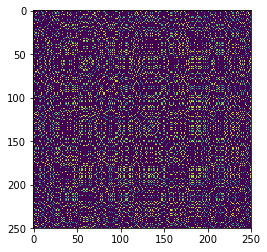

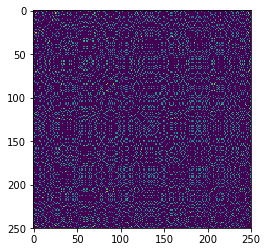

In [20]:
sigma = 2
N_dim = X.shape[0]
X_expand = X.unsqueeze(1).repeat(1,N_dim,1)
A_matrix = torch.exp(-1*((X_expand - torch.transpose(X_expand,0,1)).pow(2).sum(dim=2))/(2*sigma**2))-torch.eye(N_dim)
D_matrix = torch.diag(A_matrix.sum(dim=1)**(-0.5))
L = D_matrix@A_matrix@D_matrix
plt.imshow(A_matrix.numpy())
plt.show()
plt.imshow(L.numpy())
plt.show()

In [34]:
K=5
eig_vals, eig_vecs = eigh(L, eigvals=(N_dim-K,N_dim-1))
eig_vecs = Tensor(eig_vecs)

In [41]:
Y_matrix = (eig_vecs/(eig_vecs.pow(2).sum(dim=1).pow(0.5).unsqueeze(dim=1)))

# ENTIRE ALGORITHM
* Follows the following algorithm: https://ai.stanford.edu/~ang/papers/nips01-spectral.pdf

In [44]:
def Laplacian(X, K=5,sigma=1):
    # X => N x K || HIGH sigma, more leniency on distnace
    N_dim = X.shape[0]
    X_expand = X.unsqueeze(1).repeat(1,N_dim,1)
    A_matrix = torch.exp(-1*((X_expand - torch.transpose(X_expand,0,1)).pow(2).sum(dim=2))/(2*sigma**2))-torch.eye(N_dim)
    D_matrix = torch.diag(A_matrix.sum(dim=1)**(-0.5))
    L = D_matrix@A_matrix@D_matrix
    eig_vals, eig_vecs = eigh(L, eigvals=(N_dim-K,N_dim-1))
    eig_vecs = Tensor(eig_vecs)
    Y_matrix = (eig_vecs/(eig_vecs.pow(2).sum(dim=1).pow(0.5).unsqueeze(dim=1)))
    return Y_matrix

Laplacian(X, 5, 2)

torch.Size([250, 5])